## 'Machine Learning and Statistics' module project, ATU<br>Semester 2, 2022<br>Lecturer: Ian McLoughlin

## Task: Time Series Anomaly detection using Keras

## Contents
1. [Introduction](#Introduction)
2. [What is a Time Series?](#What-is-a-Time-Series?)
3. [Analysis of Time Series](#Analysis-of-Time-Series)
4. [What is anomaly detection?](#What-is-anomaly-detection?)
5. [Types of time series anomalies](#Types-of-time-series-anomalies)<br>
    i. [Point anomalies (global outliers)](#Point-anomalies-(global-outliers))<br>
    ii. [Collective anomalies](#Collective-anomalies)<br>
    iii. [Contextual anomalies](#Contextual-anomalies)<br>
6. [Keras setup](#Keras-setup)
7. [Visualise the data](#Visualise-the-data)<br>
    i. [Timeseries data without anomalies](#Timeseries-data-without-anomalies)<br>
    ii. [Timeseries data with anomalies](#Timeseries-data-with-anomalies)<br>
8. [Prepare the training data](#Prepare-the-training-data)<br>
    i. [Create sequences](#Create-sequences)<br>
9. [Build a model](#Build-a-model)
10. [Train the model](#Train-the-model)<br>
    i. [Training and validation loss](#Training-and-validation-loss)<br>
11. [Anomaly detection](#Anomaly-detection)

## Introduction
From the Keras website, use the example [Timeseries anomaly detection using an Autoencoder](https://keras.io/examples/timeseries/timeseries_anomaly_detection/).<br>
<br>
Re-create the example and explain the concepts in more detail.<br>
By the end of this notebook, the reader should have an understanding of what Keras does,<br>
and what it can be used for.<br>


## What is a Time Series?
A time series is a series of data points that are indexed in time order.<br>
Examples of time series are heights of ocean tides, stock market prices, house prices and many more where the index is either increasing or decreasing over time.

Time series is a data set plotted against time; that's where the term comes from.

## Analysis of Time Series
Time series data is analysed in order to extract insight from it; for example, time series forecasting tries to predict future values based on previously recorded values by using a mathematical model.<br>
From this, patterns or trends in the data might emerge that could provide insight into future behaviour of the data, i.e. cyclical or seasonal patterns.

Time series analysis of a business' data can identify trends in historical data that might be explained by processes or methods and thus future behaviour and/or patterns can be predicted.

## What is anomaly detection?

If time series data is used to forecast future behaviour, then an anomaly would be any event that lies outside the range of the expected future behaviour. 

Anomaly detection is a step in machine learning that identifies whether:
- data points
- events
- observations
that is outside the range of expected behaviour for a data set. 
Examples can include servers failing, a change in consumer behaviour, or cyberattacks. 
<br>

An anomaly is also known as an outlier.

## Types of time series anomalies

### Point anomalies (global outliers)

This is when a datapoint falls outside the expected range or pattern of the dataset.<br>
An example would be financial spending - using debit card spending as an example, the normal pattern of spending would be small to medium sized amounts, located in a particular geographical area (let's say Ireland in this case).
A point anomaly would be a large sized amount that originated in a different country - it's outside the normal geographical region and over the amount that is usually spent.

### Collective anomalies

This is when a datapoint falls within the expected range or pattern of the dataset, but when examined as a group of datapoints, unexpected patterns present themselves.<br>
Using the debit card spending as an example, we can say that the holder of the card lives and makes most of their purchases with the debit card in and around County Cork.
However, there could also be purchases that are small to medium sized in Galway - perhaps on the same day within a few minutes of each other, which would indicate a cloned card.

### Contextual anomalies
This is when datapoints are considered anomalies when considered within the context of the dataset.
Using network traffic as an example - we would expect the majority of network traffic to be during business hours, so if there's a large amount of traffic suddenly in the middle of the night, it could be a Denial-Of-Service (DOS) attack or a network intrusion attempt.

## Keras setup

The following code recreates the documentation page from the Keras website:
### Using a reconstruction convolutional autoencoder model to detect anomalies in timeseries data

Import the necessary scripts:

In [3]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

Load the [Numenta Anomaly Benchmark (NAB)](https://www.kaggle.com/boltzmannbrain/nab) dataset.<br>
This dataset provides artificial timeseries data containing labeled anomalous periods of behaviour.

Datapoints are:
- ordered
- timestamped
- single-valued

As in the Keras documentation page:
- art_daily_small_noise.csv for training
- art_daily_jumpsup.csv for testing

Because the dataset is simple, it can clearly demonstrate anomaly detection.

In [4]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

Look at the first five rows of each csv file:

In [5]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


## Visualise the data

### Timeseries data without anomalies

Use the data below for training:

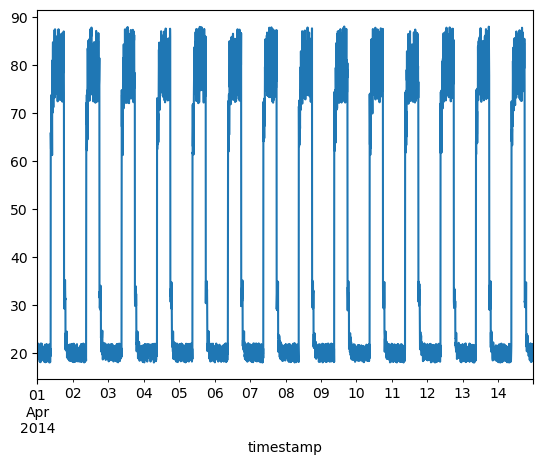

In [6]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

### Timeseries data with anomalies

Use the following data for testing and see if the data point that's out of range is detected as an anomaly

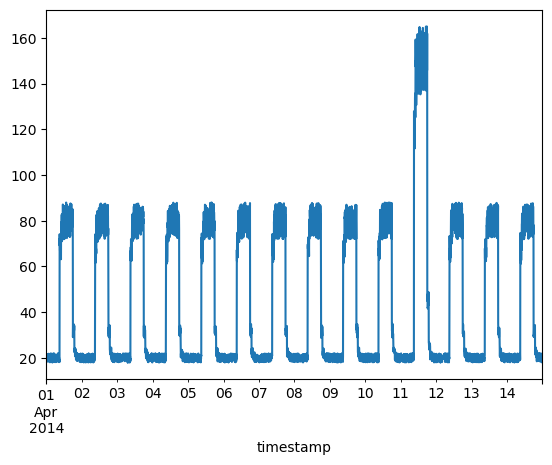

In [7]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

## Prepare the training data

We want to prepare the data so that our model can 'learn' from it and detect anomalies.

Get data values from the training timeseries data, *normalize* the <span style="color:red">value</span> data.<br>
Our <span style="color:red">value</span> data points are every 5 minutes for 14 days.
- 24 * 60 / 5 = **288 timesteps per day**
- 288 * 14 = **4032 total data points**

In [8]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


### Create sequences

Create sequences combining <span style="color:red">TIME_STEPS</span> contiguous data values from the training data:

In [9]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


## Build a model

The next step is to build a model - the convolutional reconstruction autoencoder model.<br>
The model will take input of shape:<br>
<span style="color:red">batch_size</span><br>
<span style="color:red">sequence_length</span><br>
<span style="color:red">num_features</span><br>
and return an output of the same shape.

From the created sequence above:<br>
<span style="color:red">sequence_length</span> = 288<br>
and<br>
<span style="color:red">num_features</span> = 1

In [10]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

## Train the model

Because this is a reconstruction model, <span style="color:red">x_train</span> will be used as both the input and target.

In [11]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 1s 23ms/step - loss: 0.4379 - val_loss: 0.0772
Epoch 2/50
27/27 [==============================] - 0s 14ms/step - loss: 0.0747 - val_loss: 0.0403
Epoch 3/50
27/27 [==============================] - 0s 16ms/step - loss: 0.0568 - val_loss: 0.0397
Epoch 4/50
27/27 [==============================] - 0s 14ms/step - loss: 0.0492 - val_loss: 0.0357
Epoch 5/50
27/27 [==============================] - 0s 15ms/step - loss: 0.0428 - val_loss: 0.0375
Epoch 6/50
27/27 [==============================] - 0s 15ms/step - loss: 0.0375 - val_loss: 0.0358
Epoch 7/50
27/27 [==============================] - 0s 16ms/step - loss: 0.0336 - val_loss: 0.0338
Epoch 8/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0304 - val_loss: 0.0336
Epoch 9/50
27/27 [==============================] - 0s 15ms/step - loss: 0.0278 - val_loss: 0.0321
Epoch 10/50
27/27 [==============================] - 0s 15ms/step - loss: 0.0257 - val_loss: 0.0301
Epoch 11/

### Epoch Definition

From the results above, the phrase *Epoch* is used.

Machine learning models are trained by passing datasets through algorithms.
The phrase *Epoch* is used to describe an entire dataset being passed through an algorithm once.

An Epoch is also known as a *hyperparameter*.

### Training and validation loss

Now plot the training and validation loss to check the training:

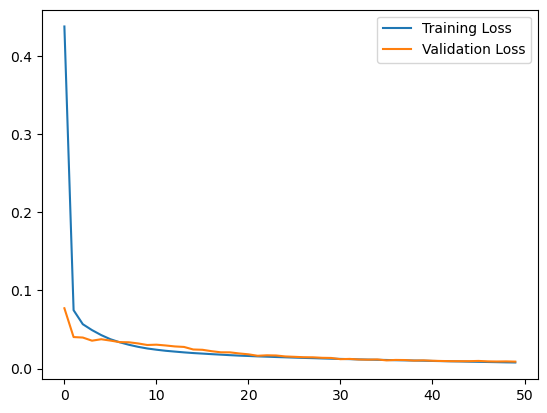

In [12]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

## Anomaly detection

Now find the anomalies by using the model to reconstruct the input data.

## Terminology

See below for deeper explanations about the terminology that's commonly used in machine learning.

### Deep Learning

Deep learning is a subset of machine learning that uses artificial neural networks to learn and find patterns in large amounts of data.

### Artificial neural networks

These are algorithms inspired by biological neural networks. Consisting of nodes and weights that are connected, where the nodes are also known as neurons.
Input signals are passed into the nodes, run through a function and multiplied by a weight to produce the final result - an output signal.

### Loss

Measures how good the deep learning model is.<br>
The loss value is the summation of errors in the model and a loss or cost function is used to calculate it.<br>
A high loss value means that model is producing lots of errors, and vice versa for a low loss value.

### Training loss

This is used to assess how well a deep learning model fits the training data presented to it. The training data is a part of the dataset used to train the model.
The training loss is calculated by taking the sum of errors for each point in the training data and is measured after each batch.

### Validation loss

This is used to assess how well the deep learning model performs on the validation data, where the validation data is a part of the dataset used to validate the model's performance.
Validation loss is also calculated from the sum of errors, but for each point in the validation set.

### Mean Absolute Error (MAE)

This is also known as L1 loss and is used for quantifying the quality of a machine learning model.
This is how we get to MAE.
1. Find the Prediction Error:<br> 
    Prediction Error = Actual Value - Predicted Value<br>
2. Get the Absolute Error:<br>
    Absolute Error = |Prediction Error|
3. MAE = average of absolute errors.

### Conclusion

### References


1. [Timeseries anomaly detection from Keras](https://keras.io/examples/timeseries/timeseries_anomaly_detection/)
2. [Numenta Anomaly Benchmark (NAB)](https://www.kaggle.com/datasets/boltzmannbrain/nab)
3. [Explanation of Time Series from Wikipedia](https://en.wikipedia.org/wiki/Time_series)
4. [Explanation of anomaly detection from IBM developer portal](https://developer.ibm.com/learningpaths/get-started-anomaly-detection-api/what-is-anomaly-detection/)
5. [Explanation of an autoencoder from Wikipedia](https://en.wikipedia.org/wiki/Autoencoder)